## HSMA 6 Certification Assessment

## Part 1

### SECTION A - Core Python
You should complete **all** of the tasks in this section.

**Task A1** 

Study the following code.  

Add to the code cell some conditional logic that checks whether the randomly generated variable `age` is already in the list of ages.  

If it is, a message should be printed to the user confirming the age and the fact that it is in the list.  

If it is not, the age should be added to the list, and a message printed confirming the age that has been added to the list. 

*(5 marks)*

In [1]:
import random

list_of_ages = [46, 21, 23, 81, 52]

age = random.randint(1,100)

# SOLUTION
if age in list_of_ages:
    print (f"Age {age} is one of the ages!")
else:
    list_of_ages.append(age)
    print (f"Age {age} added to the list")


Age 28 added to the list


**Task A2** 

Add a function to the following code that takes as its input a list of numbers, and return how many numbers in the list are precisely divisible by 3.  

Once you've written the function definition, call the function on the randomly generated list of ages, and print a message confirming how many ages in the list are divisible by 3. 

*(10 marks)*

In [2]:
import random

list_of_ages = [random.randint(1,100) for x in range(100)]

# SOLUTION
def find_numbers_divisible_by_three(list_of_nums):
    count_div_by_3 = 0

    for num in list_of_nums:
        if num % 3 == 0:
            count_div_by_3 += 1

    return count_div_by_3

total_div_by_3 = find_numbers_divisible_by_three(list_of_ages)
print (f"There are {total_div_by_3} ages divisible by 3 in the list")

There are 30 ages divisible by 3 in the list


**Task A3** 

In the following code cell, write a class definiton for a class representing a jukebox.  The jukebox should have two attributes - an era of music that it represents (stored as a string) and a dictionary which stores numbers against song titles.  The era is specified when the Jukebox is created, and the jukebox begins with no songs in its dictionary.  The jukebox class should also have three methods :

- one to add a song, given a song title and a song number
- one to remove a song, given a song number
- one to display the current songs on the jukebox, as well as a message to the user telling them what era of songs the jukebox has

Once you've written the class definition, you should create a new jukebox named `eighties_jukebox` (Note - do NOT name it `80s_jukebox` or you will run into problems).  Add three songs to the jukebox :
- Song 1 : The One and Only
- Song 2 : Everywhere
- Song 3 : West End Girls

Then display the current songs on the jukebox.

Then, remove song 2, and display the current songs again. 

*(15 marks)*

In [3]:
# SOLUTION
class Jukebox:
    def __init__(self, specified_era):
        self.era = specified_era

        self.jukebox_dictionary = {}

    def add_song(self, song_title, song_number):
        self.jukebox_dictionary[song_number] = song_title

    def remove_song(self, song_number):
        del self.jukebox_dictionary[song_number]

    def display_current_songs(self):
        print (f"This is a jukebox of {self.era} songs")
        print (self.jukebox_dictionary)

eighties_jukebox = Jukebox("80s")

eighties_jukebox.add_song("The One and Only", 1)
eighties_jukebox.add_song("Everywhere", 2)
eighties_jukebox.add_song("West End Girls", 3)

eighties_jukebox.display_current_songs()

eighties_jukebox.remove_song(2)

eighties_jukebox.display_current_songs()


This is a jukebox of 80s songs
{1: 'The One and Only', 2: 'Everywhere', 3: 'West End Girls'}
This is a jukebox of 80s songs
{1: 'The One and Only', 3: 'West End Girls'}


---

## Part 2

You should now select just **TWO** of the following sections to answer.  

Do not answer more than two, as only two will be marked.  

It is also recommended that if you change your mind about tackling a particular task and choose another instead, you should delete any code you began in the task you rejected before submitting your notebook.  

All tasks in the following sections are worth identical marks.

---

#### SECTION B - Discrete Event Simulation

**Task B** 

*Use the **des** environment for this question*

Study the following simplified SimPy model of Dan's Diner.  In Dan's Diner, diners arrive, wait for a server to order their food, then wait for a table to sit and eat their food before leaving.  Your task is to complete the missing code as indicated below.  Specifically :

- write the code for the generator function that generates new diner arrivals (`generator_diner_arrivals`).  You should use the `diner_counter` to provide each diner with a unique ID.  You should assume that the inter-arrival times of diners are exponentially distributed.
- write the code for the generator function representing an individual diner's journey through Dan's Diner (`attend_diner`).  You should assume that the times that diners spend ordering and eating are exponentionally distributed.  You should calculate the time each diner spends in each queue and record this against their attributes (`q_time_order` and `q_time_table`).  HOWEVER, you do NOT need to record the data anywhere else, such as in a DataFrame.

You should note that this is a simplified model that only runs for one run and does not record results across the run - the only recorded metrics are the queuing times stored by each diner.  If you have written the code correctly, the model should run and display messages such as "Diner 11 waited 3 mins to be served and 10 mins for a table" 

*(20 marks)*

In [4]:
import simpy
import random

class g:
    diner_inter = 1
    mean_order_time = 2
    mean_eating_time = 15
    number_of_servers = 2
    number_of_tables = 5
    sim_duration = 120

class Diner:
    def __init__(self, d_id):
        self.id = d_id
        self.q_time_order = 0
        self.q_time_table = 0

class Dans_Diner_Model:
    def __init__(self):
        self.env = simpy.Environment()

        self.diner_counter = 0

        self.server = simpy.Resource(self.env, capacity=g.number_of_servers)
        self.table = simpy.Resource(self.env, capacity=g.number_of_tables)

    def generator_diner_arrivals(self):
        # SOLUTION - INSERT CODE HERE
        while True:
            self.diner_counter += 1
            d = Diner(self.diner_counter)
            self.env.process(self.attend_diner(d))
            sampled_inter = random.expovariate(1.0 / g.diner_inter)
            yield self.env.timeout(sampled_inter)

    def attend_diner(self, diner):
        # SOLUTION - INSERT CODE HERE
        start_q_order = self.env.now

        with self.server.request() as req:
            yield req

            end_q_order = self.env.now

            diner.q_time_order = end_q_order - start_q_order

            sampled_order_time = random.expovariate(1.0 / g.mean_order_time)

            yield self.env.timeout(sampled_order_time)

        start_q_table = self.env.now

        with self.table.request() as req:
            yield req

            end_q_table = self.env.now

            diner.q_time_table = end_q_table - start_q_table

            sampled_eating_time = random.expovariate(1.0 / g.mean_eating_time)

            yield self.env.timeout(sampled_eating_time)

        # END OF SOLUTION - PROVIDE BELOW CODE
        print (f"Diner {diner.id} waited {diner.q_time_order:.0f} mins to be",
               f"served and {diner.q_time_table:.0f} mins for a table")

    def run(self):
        self.env.process(self.generator_diner_arrivals())
        self.env.run(until=g.sim_duration)

my_diner_model = Dans_Diner_Model()
my_diner_model.run()


Diner 4 waited 0 mins to be served and 0 mins for a table
Diner 7 waited 2 mins to be served and 0 mins for a table
Diner 2 waited 0 mins to be served and 0 mins for a table
Diner 3 waited 0 mins to be served and 0 mins for a table
Diner 1 waited 0 mins to be served and 0 mins for a table
Diner 9 waited 4 mins to be served and 7 mins for a table
Diner 8 waited 2 mins to be served and 8 mins for a table
Diner 12 waited 4 mins to be served and 13 mins for a table
Diner 10 waited 4 mins to be served and 22 mins for a table
Diner 14 waited 0 mins to be served and 21 mins for a table
Diner 13 waited 1 mins to be served and 22 mins for a table
Diner 16 waited 1 mins to be served and 30 mins for a table
Diner 6 waited 1 mins to be served and 0 mins for a table
Diner 18 waited 1 mins to be served and 31 mins for a table
Diner 5 waited 0 mins to be served and 0 mins for a table
Diner 20 waited 1 mins to be served and 42 mins for a table
Diner 17 waited 2 mins to be served and 31 mins for a tabl

#### SECTION C - GEOGRAPHIC MODELLING AND VISUALISATION

**Task C** 

*Use the **geographic** environment for this question*

You have been provided with 
- the name, latitude and longitude of the 20 biggest theme parks in the UK *(theme_park_locations_gdf)*
- the travel times (by car, in minutes) to these theme parks from a range of Local Authorities in England *(travel_times_df)*
- a geographic data file containing the boundaries of these local authorities *(local_authority_boundaries_gdf)*

In the code cell below, create a static (non-interactive) map showing the travel time from each Local Authority to its **nearest** theme park. 

You will need to perform the following steps to create this map. 

1. Create an extra column in the dataframe *travel_times_df* calculating the nearest theme park for each Local Authority.

2. Join *local_authority_boundaries_gdf* and *travel_times_df*. 
    - Note that they both contain the column "LAD21NM", though it is the *index* of *local_authority_boundaries_gdf*. You may need to use the command *.reset_index()* on *local_authority_boundaries_gdf* during this step. 

3. Plot the travel times.
    - The colour of each Local Authority should reflect the travel time to the location. 
    - Your map should include
        - a legend showing what the colour indicates
        - a title

4. Finally, plot the location of the theme parks *(theme_park_locations_gdf)* as points on the **same map**. Use 'blue' as the colour for the points.  

Note that all geographic data in this task makes use of latitude and longitude. If you are specifying a CRS in your code, use **EPSG:4326**. 

*(20 marks)*

<Axes: title={'center': 'Travel Time to Theme Parks'}>

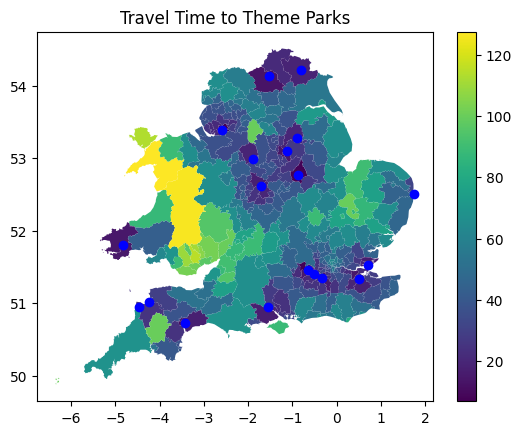

In [5]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

travel_times_df = pd.read_csv("data/la_to_theme_park_travel.csv", index_col="LAD21NM")
theme_park_locations_gdf = geopandas.read_file("data/Theme_Parks_England.geojson")
local_authority_boundaries_gdf = geopandas.read_file("data/local_authority_boundaries.geojson")

# SOLUTION

travel_times_df['shortest'] = travel_times_df.min(axis=1)

nearest_theme_park_gdf = pd.merge(
    local_authority_boundaries_gdf,
    travel_times_df.reset_index(),
    left_on="LAD21NM",
    right_on="LAD21NM",
    how="right"
)

ax = nearest_theme_park_gdf.plot(
    column='shortest',
    legend=True
    )

ax.set_title("Travel Time to Theme Parks")

theme_park_locations_gdf.plot(ax=ax, color="blue")


#### SECTION D - DEEP LEARNING

**Task D**

*Use the **tf_hsma** environment for this question*

In the code cell below, using the Keras API build a Sequential Neural Network comprised of : 
- A densely connected layer with 16 hidden neurons, an input dimension of 30 features and a rectified linear unit activation function on each neuron
- A dropout layer with a dropout rate of 40%
- Another pair of layers exactly as described above
- An output layer consisting of one densely connected neuron with a sigmoid activation function

Once you have built the model, compile it with a binary crossentropy loss function, an Adam optimizer and a metric of accuracy to monitor.  Then print a summary of the network's structure.

Note - you do not need to read in, use or manipulate any data for this task, nor do you need to train the model.  Just build the structure of the network, compile it and show a summary of its structure. 


*(20 marks)*

In [6]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# SOLUTION
net = Sequential()

net.add(Dense(16,input_dim=30, activation='relu'))
net.add(Dropout(0.4))
net.add(Dense(16,input_dim=30, activation='relu'))
net.add(Dropout(0.4))
net.add(Dense(1, activation='sigmoid'))

net.compile(loss='binary_crossentropy',
            optimizer='Adam',
            metrics=['accuracy'])

net.summary()

c:\Users\Sammi\Anaconda3\envs\hsma_assessment\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

#### SECTION E - TREE-BASED MACHINE LEARNING MODELS

**Task E** 

*Use the **ml_sammi** environment for this question*

Dan has been keeping a record of the different cat treats Prince likes, and the details of those treats such as their protein content and the main flavours. This is stored in `prince_treats.csv`.

Train an XGBoost model on the provided dataset. 

- Split the data into X (your features) and y (your target - the column `prince_likes`, with 1 indicating that Prince liked the treat and 0 indicating that he didn't). 

- Split these into training and testing sets.
    - Use 70% of the dataset for training, and 30% for testing. 
    - Make sure you set a random seed so that your results are reproducible.

- Initialise an XGBoost model and train it on the relevant datasets. 

- Use your model to create predictions, then 
    - For your testing data, calculate the accuracy and 'macro' f1 score, and print these values to three decimal places.
    - Create an AUC plot using your testing dataset. 
    - Create a confusion matrix using your testing dataset. (hint: if this doesn't display in the notebook, try adding '.plot()' to the end of your code)

*(20 marks)*

Accuracy of predicting test data = 0.787
F1 score = 0.735


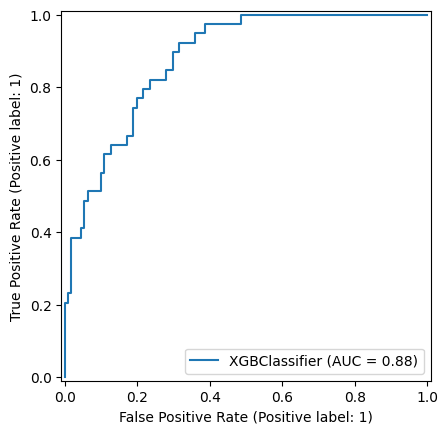

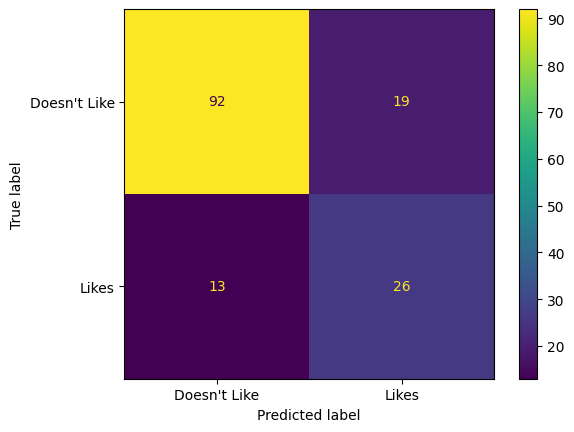

In [7]:
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, accuracy_score, f1_score, \
                            confusion_matrix, ConfusionMatrixDisplay

treats_df = pd.read_csv("data/prince_treats.csv")

#SOLUTION
X = treats_df.drop('prince_likes', axis=1) # X = all 'data' except the 'died' column
y = treats_df['prince_likes'] # y = 'died' column from 'data'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = XGBClassifier(random_state=42)
model = model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = f1_score(y_test, y_pred_test, average='macro')

print (f'Accuracy of predicting test data = {accuracy_test:.3f}')
print (f'F1 score = {precision_test :.3f}')

RocCurveDisplay.from_estimator(
    model, X_test, y_test
)

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test
        ),
        display_labels=["Doesn't Like", "Likes"]
).plot()


#### SECTION F - NATURAL LANGUAGE PROCESSING

**Task F** 

*Use the **nlp_basics** environment for this question.*  **IMPORTANT-You will need to pip install the `requests` library in this environment in order for the code to work, if you have not already done so**

The code cell below reads in the sarcastic reviews HSMAs wrote for session 5C of HSMA 6.  Add to this code cell to vectorize the text in each review using a bag of words representation.  Convert the vectorization into a Pandas DataFrame, and then :

1. print the vector of numbers representing the second review
2. print the frequencies of the word "world" across all 10 reviews

*(20 marks)*

In [8]:
import urllib.request
import pandas as pd
import requests
from sklearn.feature_extraction.text import CountVectorizer

list_of_reviews = []

for review_num in range(1,11):
    url = ("https://raw.githubusercontent.com/hsma-programme/"
           "h6_5c_sentiment_analysis/main/5c_sentiment_analysis/"
           f"sarcastic_reviews/sarcastic_{review_num}.txt")
    response = requests.get(url)
    list_of_reviews.append(response.text)

# SOLUTION
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(list_of_reviews)

column_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=column_names)

print (bow_df.iloc[1].values)

selected_word = "world"
print (bow_df[selected_word])


[0 0 1 ... 1 0 0]
0    2
1    0
2    0
3    0
4    2
5    0
6    0
7    1
8    1
9    0
Name: world, dtype: int64


#### SECTION G - BEHAVIOURAL MODELLING

**Task G** 

*Use the **abs** environment for this question*

The code below is setting up an Agent Based Simulation of a zombie apocalypse in MESA.  However, there are three methods missing in the `Human` class, which you need to write :
1. a `move` method which will move the agent to a *different* cell at random using a Moore neighbourhood
2. an `infect` method which will check if there are other agents in the same cell, and if so will turn any non-zombies in the cell into zombies based on the infection probability of the zombie (this method will only called by the step function if the agent is a zombie, so you don't need to check that logic in this method).  If the zombie turns others into zombies, they should also halve the movement frequency of their newly infected victims.
3. a `step` method which will first decide whether or not to move the agent (based on their movement probability), and if so begin the move process, and then check whether they are a zombie, and if so begin the infection process.

*(20 marks)*

In [9]:
import mesa

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

import random
import pandas as pd

class Human(Agent):
    def __init__(self, unique_id, model, initial_zombie_prob, infect_prob,
                 movement_prob):
        super().__init__(unique_id, model)

        self.infect_prob = infect_prob
        self.movement_prob = movement_prob

        if random.uniform(0, 1) < initial_zombie_prob:
            self.is_a_zombie = True
            self.movement_prob = self.movement_prob / 2
        else:
            self.is_a_zombie = False

    # SOLUTION
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )

        new_position = random.choice(possible_steps)

        self.model.grid.move_agent(self, new_position)

    def infect(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])

        if len(cellmates) > 1:
            for inhabitant in cellmates:
                if inhabitant.is_a_zombie == False:
                    if random.uniform(0,1) < self.infect_prob:
                        inhabitant.is_a_zombie = True
                        inhabitant.movement_prob = inhabitant.movement_prob / 2

    def step(self):
        if random.uniform(0,1) < self.movement_prob:
            self.move()

        if self.is_a_zombie == True:
            self.infect()
    # END OF SOLUTION

class Zombie_Model(Model):
    def __init__(self, N, width, height, initial_zombie_prob, infect_prob,
                 movement_prob):
        self.running = True
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            h = Human(i, self, initial_zombie_prob, infect_prob, movement_prob)
            self.schedule.add(h)

            self.grid.place_agent(h, (
                random.randrange(self.grid.width),
                random.randrange(self.grid.height)
            ))

        self.datacollector = DataCollector(
            model_reporters = {"Total Zombies":calculate_number_of_zombies},
            agent_reporters = {}
        )

    def step(self):
        self.datacollector.collect(self)

        self.schedule.step()

def calculate_number_of_zombies(model):
    zombie_list = [True for human in model.schedule.agents
                   if human.is_a_zombie == True]

    return len(zombie_list)

params = {"width":100,
          "height":100,
          "N":100,
          "initial_zombie_prob":0.3,
          "infect_prob":0.8,
          "movement_prob":0.7}

results = mesa.batch_run(
    Zombie_Model,
    parameters=params,
    iterations=2,
    max_steps=200,
    number_processes=1,
    data_collection_period=-1,
    display_progress=True
)

results_df = pd.DataFrame(results)
print (results_df)

  0%|          | 0/2 [00:00<?, ?it/s]

   RunId  iteration  Step  width  height    N  initial_zombie_prob  \
0      0          0   200    100     100  100                  0.3   
1      1          1   200    100     100  100                  0.3   

   infect_prob  movement_prob  Total Zombies  
0          0.8            0.7             38  
1          0.8            0.7             52  


C:\Users\Sammi\AppData\Local\Temp\ipykernel_3040\2824479132.py:14: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


#### SECTION H - STREAMLIT

**TASK H**

*Use the **hsma_webdev** environment for this question*

*HINT - You may wish to write the app in a separate .py file so you can test it and ensure it runs correctly. Make sure you then paste your code into the code cell below when you are done.*

You have been provided with
- a *dataframe* of **yearly** counts of a series of animals (animal_df)
- a *list* of the individual animals represented in the dataset (animal_list)

You have also been provided with two functions
- get_fact()
- get_image()

Write a Streamlit app that

- displays an appropriate title
- provides the user with a way of selecting an **animal**. You can use any appropriate user input you like to allow them to select this. 
- provides a 'run' button for the user to press. 

**All graphs and tables in the app should reflect the selected animal - you will need to filter the dataframes to achieve this**

When the user presses the button, two tabs should appear.

**In tab 1**
*In column 1*
- display the fact about the animal using the *get_fact()* function and an appropriate streamlit command

*In column 2*
- display a picture of the animal using the *get_image()* function and an appropriate streamlit command

**In tab 2**

- display a line plot of how many of that animal have been counted each year using a plotting library of your choice

- display your filtered dataframe using an appropriate streamlit command. *Don't worry if the 'year' column displays a bit strangely!*


Finally, When you have completed the above tasks, change the original data import to use **caching**.

*(20 marks)*


In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

# A dataframe of animals, containing yearly counts, facts and image links
animal_df = pd.read_csv("data/animal_counts.csv").sort_values(["Common_name", "Year"])
# A list of the unique animals in the dataset
animals = animal_df["Common_name"].unique()

def get_fact(dataframe):
    return dataframe["Fact"].values[0]

def get_image(dataframe):
    return dataframe["Image"].values[0]

# SOLUTION
@st.cache_data
def load_data():
    return pd.read_csv("data/animal_counts.csv").sort_values(["Common_name", "Year"])

animal_df = load_data()
animals = animal_df["Common_name"].unique()

st.title("Animal Numbers Over Time")

selected_animal = st.selectbox("Select an Animal", animals)

button_run_pressed = st.button("Run")

if button_run_pressed:

    # Filtering
    single_animal_df = animal_df[animal_df["Common_name"] == selected_animal]

    # Setting up tabs
    tab1, tab2 = st.tabs(["Animal Details", "Numbers over time"])

    # Displaying the overall data for the animal in tab 1
    with tab1:

        st.subheader(selected_animal)

        col1, col2 = st.columns(2)

        with col1:
            st.write(get_fact(single_animal_df))

        with col2:
            st.image(get_image(single_animal_df))

    # Displaying the yearly dataframe and table in the final output
    with tab2:
        st.plotly_chart(
                px.line(single_animal_df,
                            x="Year",
                            y="Count")
            )

        st.dataframe(single_animal_df[["Year", "Count"]], hide_index=True)